# MOB NETWORK

Network analysis of the Sicilian Mafia clans of Mistretta and Batanesi, investigated during the Police operation "Montagna" in 2007.

This analysis has been inspired by the article: [Cavallaro, Lucia, et al. "Disrupting resilient criminal networks through data analysis: The case of Sicilian Mafia." (2020)](https://arxiv.org/abs/2003.05303)

The dataset is available on [github/lcucav/networkdisruption](https://github.com/lcucav/networkdisruption/tree/master/src/Datasets)

In [132]:
# libraries import
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import linregress


## Preprocessing

Upload dataset meetings in person

In [83]:
file_path = 'Dataset/Montagna_meetings_edgelist.csv'
df_meetings_w = pd.read_csv(file_path, delimiter='\t')
df_meetings_w.head()

,0,1,1.1
0,0,2,1
1,1,2,1
2,3,4,1
3,3,5,1
4,3,6,1


In [84]:
# rename columns
df_meetings_w.rename(columns={'0':'v_i', '1':'v_j', '1.1':'weight'}, inplace=True)

In [85]:
df_meetings_w.head()

,v_i,v_j,weight
0,0,2,1
1,1,2,1
2,3,4,1
3,3,5,1
4,3,6,1


## Graph creation

create Graph

In [86]:
G = nx.Graph() # weighted
Gu = nx.Graph() # unweighted

In [87]:
# weighted
for _, row in df_meetings_w.iterrows():
    G.add_edge(row['v_i'], row['v_j'], weight=row['weight'])


In [88]:
# unweighted
for _, row in df_meetings_w.iterrows():
    Gu.add_edge(row['v_i'], row['v_j'])

In [89]:
print(G)

Graph with 101 nodes and 255 edges


In [90]:
print(Gu)

Graph with 101 nodes and 255 edges


In [91]:
# Degree of each node weighted
degree = dict(G.degree(weight='weight'))
degree = dict(sorted(degree.items()))

In [92]:
# Degree of each node unweighted
degree_u = dict(Gu.degree())
degree_u = dict(sorted(degree_u.items()))

In [93]:
print(degree)

{0: 1, 1: 1, 2: 2, 3: 8, 4: 6, 5: 10, 6: 10, 7: 6, 8: 6, 9: 6, 10: 5, 11: 15, 12: 21, 13: 10, 14: 10, 15: 10, 16: 1, 17: 1, 18: 30, 19: 11, 20: 2, 21: 2, 22: 22, 23: 10, 24: 1, 25: 17, 26: 2, 27: 27, 28: 5, 29: 23, 30: 2, 31: 3, 32: 2, 33: 4, 34: 8, 35: 5, 36: 11, 37: 2, 38: 7, 39: 7, 40: 3, 41: 3, 42: 3, 43: 13, 44: 3, 45: 24, 46: 4, 47: 54, 48: 24, 49: 4, 50: 18, 51: 23, 52: 3, 53: 2, 54: 7, 55: 2, 56: 1, 57: 1, 58: 2, 59: 2, 60: 2, 61: 4, 62: 1, 63: 8, 64: 13, 65: 1, 66: 1, 67: 1, 68: 25, 69: 1, 70: 15, 71: 2, 72: 3, 73: 1, 74: 1, 75: 5, 76: 9, 77: 5, 78: 2, 79: 5, 80: 3, 81: 3, 82: 3, 83: 2, 84: 4, 85: 9, 86: 4, 87: 4, 88: 2, 89: 34, 90: 4, 91: 2, 92: 2, 93: 11, 94: 2, 95: 3, 96: 1, 97: 3, 98: 2, 99: 1, 100: 4}


In [94]:
print(degree_u)

{0: 1, 1: 1, 2: 2, 3: 8, 4: 6, 5: 10, 6: 10, 7: 6, 8: 6, 9: 6, 10: 5, 11: 12, 12: 16, 13: 6, 14: 6, 15: 6, 16: 1, 17: 1, 18: 24, 19: 9, 20: 2, 21: 2, 22: 14, 23: 8, 24: 1, 25: 13, 26: 2, 27: 16, 28: 5, 29: 13, 30: 2, 31: 2, 32: 2, 33: 3, 34: 6, 35: 5, 36: 8, 37: 2, 38: 3, 39: 7, 40: 3, 41: 3, 42: 3, 43: 9, 44: 3, 45: 12, 46: 4, 47: 19, 48: 12, 49: 4, 50: 8, 51: 11, 52: 3, 53: 2, 54: 6, 55: 2, 56: 1, 57: 1, 58: 2, 59: 2, 60: 2, 61: 4, 62: 1, 63: 4, 64: 6, 65: 1, 66: 1, 67: 1, 68: 15, 69: 1, 70: 6, 71: 2, 72: 2, 73: 1, 74: 1, 75: 4, 76: 7, 77: 3, 78: 2, 79: 5, 80: 3, 81: 3, 82: 3, 83: 2, 84: 4, 85: 8, 86: 4, 87: 4, 88: 2, 89: 12, 90: 2, 91: 2, 92: 2, 93: 6, 94: 2, 95: 3, 96: 1, 97: 3, 98: 2, 99: 1, 100: 4}


In [95]:
# checking which nodes have different degrees between weighted and unweighted
difference_degree = {}
for i in degree.keys():
    if degree[i] == degree_u[i]:
        continue
    else:
        difference_degree.update({i : degree[i] - degree_u[i]})
    
print(difference_degree)
print(f'Number of different links = {len(difference_degree)}')

{11: 3, 12: 5, 13: 4, 14: 4, 15: 4, 18: 6, 19: 2, 22: 8, 23: 2, 25: 4, 27: 11, 29: 10, 31: 1, 33: 1, 34: 2, 36: 3, 38: 4, 43: 4, 45: 12, 47: 35, 48: 12, 50: 10, 51: 12, 54: 1, 63: 4, 64: 7, 68: 10, 70: 9, 72: 1, 75: 1, 76: 2, 77: 2, 85: 1, 89: 22, 90: 2, 93: 5}
Number of different links = 36


Plot Weighted Graph

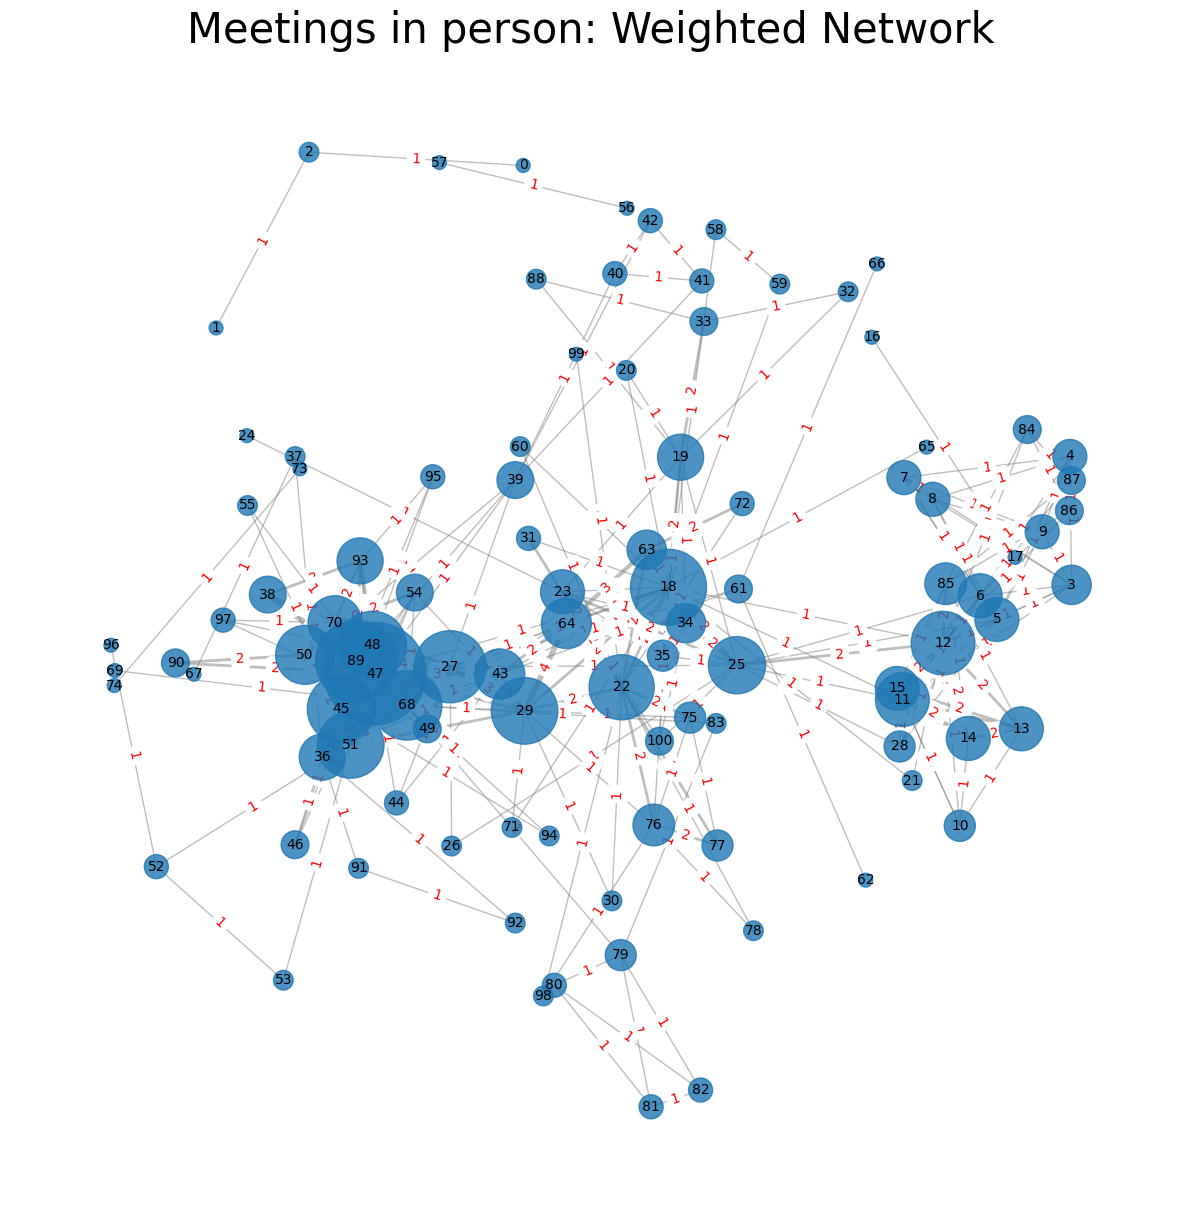

In [96]:
# Visualize the graph
plt.figure(figsize=(15, 15)) 

# Use spring layout with a higher k value to spread nodes apart
pos = nx.spring_layout(G, k=0.5)

# Drawing nodes
node_sizes = [degree[node] * 100 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.8)

# Drawing edges
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')

# Adding labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Adding edge weight labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Title
plt.title('Meetings in person: Weighted Network', fontsize=30)

# Show plot
plt.axis('off')
plt.show()

Plot Unweighted Graph

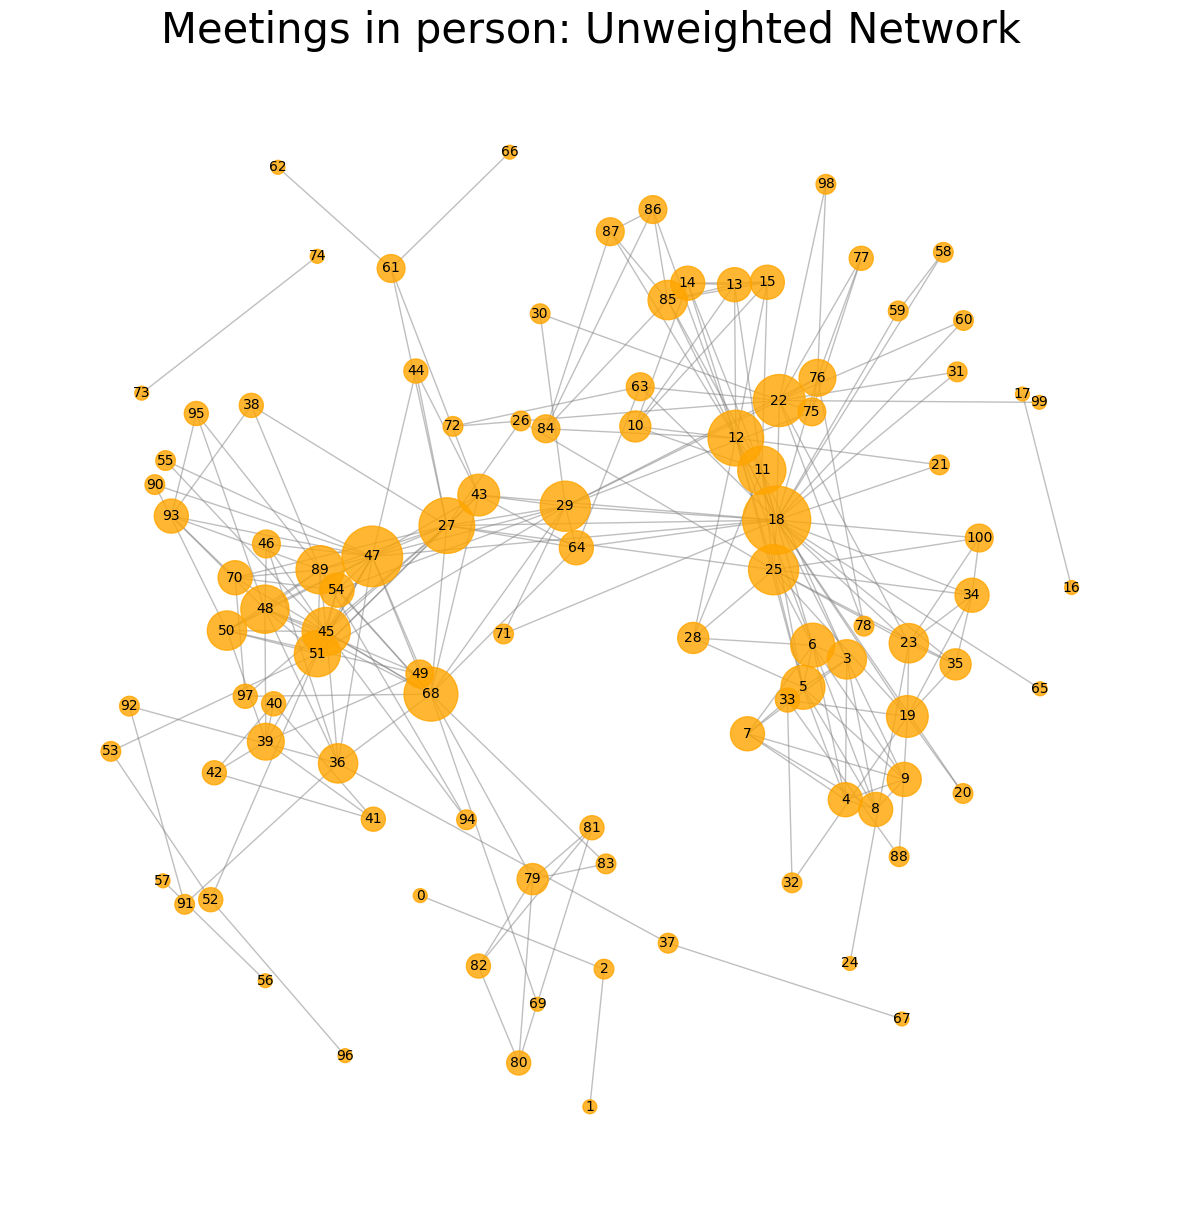

In [97]:
# Visualize the unweighted graph
plt.figure(figsize=(15, 15))

# Use spring layout with a higher k value to spread nodes apart
pos = nx.spring_layout(Gu, k=0.5)

# Drawing nodes
node_sizes = [degree_u[node] * 100 for node in Gu.nodes()] 
nx.draw_networkx_nodes(Gu, pos, node_size=node_sizes, node_color='orange', alpha=0.8)

# Drawing edges
nx.draw_networkx_edges(Gu, pos, alpha=0.5, edge_color='gray')

# Adding labels
nx.draw_networkx_labels(Gu, pos, font_size=10, font_color='black')

# Title
plt.title('Meetings in person: Unweighted Network', fontsize=30)

# Show plot
plt.axis('off')
plt.show()


## Graph properties

### DENSITY

In [98]:
meetings_density = nx.density(G)
print(f'WN density = {meetings_density}') # weighted network

meetings_density_u = nx.density(Gu)
print(f'UN density = {meetings_density_u}') # unweighted network

WN density = 0.0504950495049505
UN density = 0.0504950495049505


#### Create Random Network

Create Erdos-Renyi random network G(N,p)

In [99]:
# create RN
N = Gu.number_of_nodes()
p = meetings_density_u

random_network = nx.erdos_renyi_graph(N, p)

### DEGREE

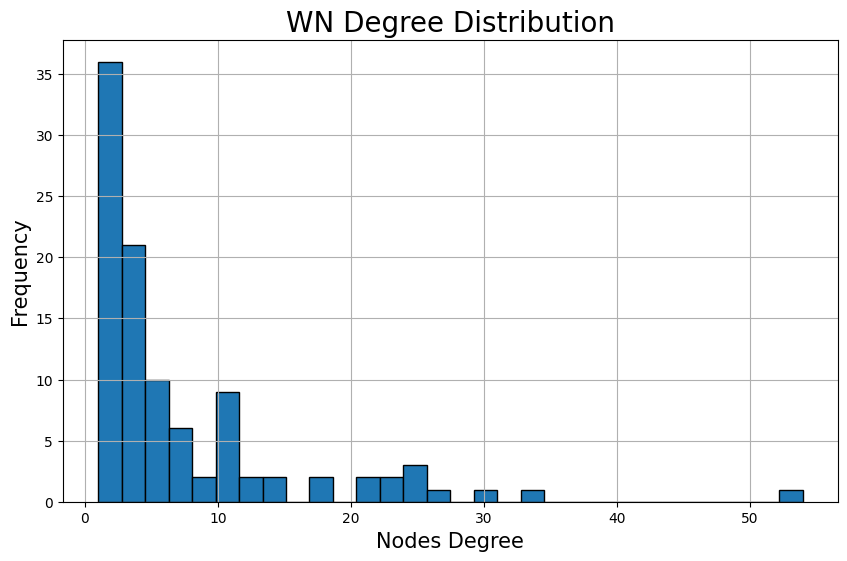

In [100]:
degree_list = list(degree.values())

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_list, bins=30, edgecolor='black')
plt.title('WN Degree Distribution', fontsize=20)
plt.xlabel("Nodes Degree", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)

# Show plot
plt.show()

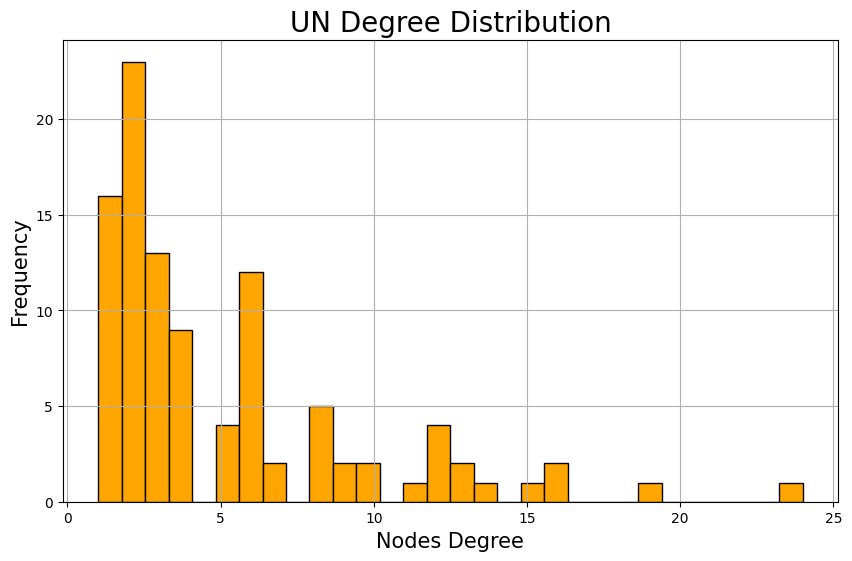

In [101]:
# unweighted
degree_list_u = list(degree_u.values())

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_list_u, bins=30, edgecolor='black', color='orange')
plt.title('UN Degree Distribution', fontsize=20)
plt.xlabel("Nodes Degree", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)

# Show plot
plt.show()

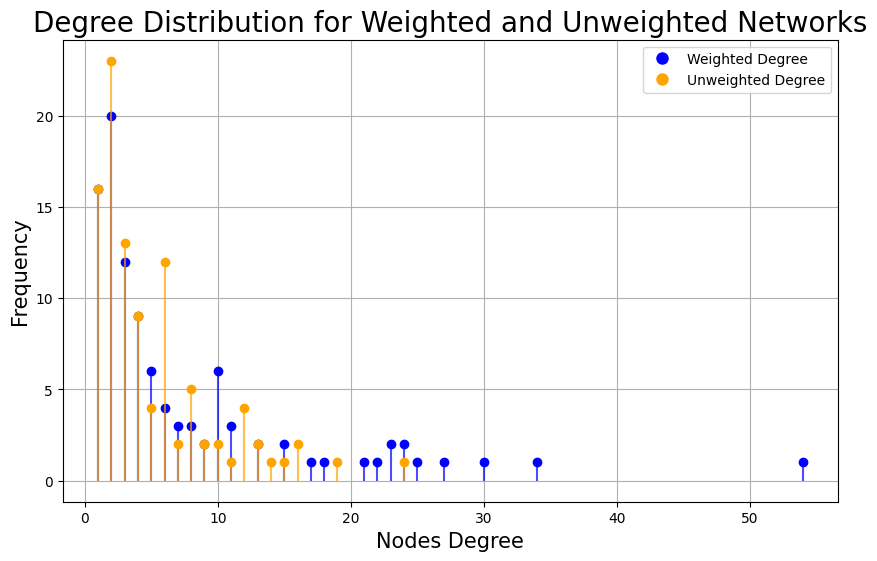

In [102]:
# Plot the degree distribution
plt.figure(figsize=(10, 6))

# Vertical lines with dots for weighted degree
weighted_degree_counts = pd.Series(degree_list).value_counts().sort_index()
for d, count in weighted_degree_counts.items():
    plt.vlines(x=d, ymin=0, ymax=count, color='blue', alpha=0.7)
    plt.plot(d, count, 'o', color='blue')

# Vertical lines with dots for unweighted degree
unweighted_degree_counts = pd.Series(degree_list_u).value_counts().sort_index()
for d, count in unweighted_degree_counts.items():
    plt.vlines(x=d, ymin=0, ymax=count, color='orange', alpha=0.7)
    plt.plot(d, count, 'o', color='orange')

# Add title and labels
plt.title('Degree Distribution for Weighted and Unweighted Networks', fontsize=20)
plt.xlabel("Nodes Degree", fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Add grid
plt.grid(True)

# Create custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Weighted Degree'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Unweighted Degree')
]
plt.legend(handles=legend_elements)

# Show plot
plt.show()

#### Weighted

In [103]:
# weighted
avg_degree = np.mean(degree_list)
min_degree = np.min(degree_list)
max_degree = np.max(degree_list)
std_degree = np.std(degree_list)
median_degree = np.median(degree_list)

print('WEIGHTED:')
print(f'AVG DEGREE = {avg_degree}')
print(f'MIN DEGREE = {min_degree}')
print(f'MAX DEGREE = {max_degree}')
print(f'STD DEGREE = {std_degree}')
print(f'MEDIAN DEGREE = {median_degree}')

WEIGHTED:
AVG DEGREE = 7.287128712871287
MIN DEGREE = 1
MAX DEGREE = 54
STD DEGREE = 8.6771997053201
MEDIAN DEGREE = 4.0


#### Unweighted

In [104]:
# unweighted
avg_degree_u = np.mean(degree_list_u)
min_degree_u = np.min(degree_list_u)
max_degree_u = np.max(degree_list_u)
std_degree_u = np.std(degree_list_u)
median_degree_u = np.median(degree_list_u)

print('UNWEIGHTED:')
print(f'AVG DEGREE = {avg_degree_u}')
print(f'MIN DEGREE = {min_degree_u}')
print(f'MAX DEGREE = {max_degree_u}')
print(f'STD DEGREE = {std_degree_u}')
print(f'MEDIAN DEGREE = {median_degree_u}')

UNWEIGHTED:
AVG DEGREE = 5.0495049504950495
MIN DEGREE = 1
MAX DEGREE = 24
STD DEGREE = 4.4618875320861004
MEDIAN DEGREE = 3.0


##### Degree distribution

Compute p_k = N_k/N

In [105]:
degree_count_u = {}
degree_distribution_u = {}
for degree in degree_list_u:
    if degree in degree_count_u:
        degree_count_u[degree] += 1
    else:
        degree_count_u[degree] = 1
degree_count_u = dict(sorted(degree_count_u.items()))

for k, n_k in degree_count_u.items():
    degree_distribution_u.update({k: n_k/N})


#### RN comparison

In [106]:
# degree
degree_rn = dict(random_network.degree())
degree_rn = dict(sorted(degree_rn.items()))
degree_list_rn = list(degree_rn.values())

avg_degree_rn = np.mean(degree_list_rn)
min_degree_rn = np.min(degree_list_rn)
max_degree_rn = np.max(degree_list_rn)
std_degree_rn = np.std(degree_list_rn)
median_degree_rn = np.median(degree_list_rn)

print('RANDOM NETWORK:')
print(f'AVG DEGREE = {avg_degree_rn}')
print(f'MIN DEGREE = {min_degree_rn}')
print(f'MAX DEGREE = {max_degree_rn}')
print(f'STD DEGREE = {std_degree_rn}')
print(f'MEDIAN DEGREE = {median_degree_rn}')

RANDOM NETWORK:
AVG DEGREE = 5.069306930693069
MIN DEGREE = 1
MAX DEGREE = 13
STD DEGREE = 2.230559250313671
MEDIAN DEGREE = 5.0


##### RN Degree Distribution

In [107]:
degree_count_rn = {}
degree_distribution_rn = {}
for degree in degree_list_rn:
    if degree in degree_count_rn:
        degree_count_rn[degree] += 1
    else:
        degree_count_rn[degree] = 1
degree_count_rn = dict(sorted(degree_count_rn.items()))

for k, n_k in degree_count_rn.items():
    degree_distribution_rn.update({k: n_k/N})

In [108]:
print(list(degree_distribution_u.keys()))
print(degree_distribution_u.values())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 24]
dict_values([0.15841584158415842, 0.22772277227722773, 0.12871287128712872, 0.0891089108910891, 0.039603960396039604, 0.1188118811881188, 0.019801980198019802, 0.04950495049504951, 0.019801980198019802, 0.019801980198019802, 0.009900990099009901, 0.039603960396039604, 0.019801980198019802, 0.009900990099009901, 0.009900990099009901, 0.019801980198019802, 0.009900990099009901, 0.009900990099009901])


Plot

In [133]:
# Convert degree distribution to log-log scale
log_degrees_u = np.log(list(degree_distribution_u.keys()))
log_freqs_u = np.log(list(degree_distribution_u.values()))

log_degrees_rn = np.log(list(degree_distribution_rn.keys()))
log_freqs_rn = np.log(list(degree_distribution_rn.values()))

# Fit a line to the log-log data for the real network
slope_u, intercept_u, r_value_u, p_value_u, std_err_u = linregress(log_degrees_u, log_freqs_u)
fit_line_u = slope_u * log_degrees_u + intercept_u

# Fit a polynomial to the log-log data for the random network
poly_coeffs_rn = np.polyfit(log_degrees_rn, log_freqs_rn, deg=2)
poly_fit_rn = np.poly1d(poly_coeffs_rn)

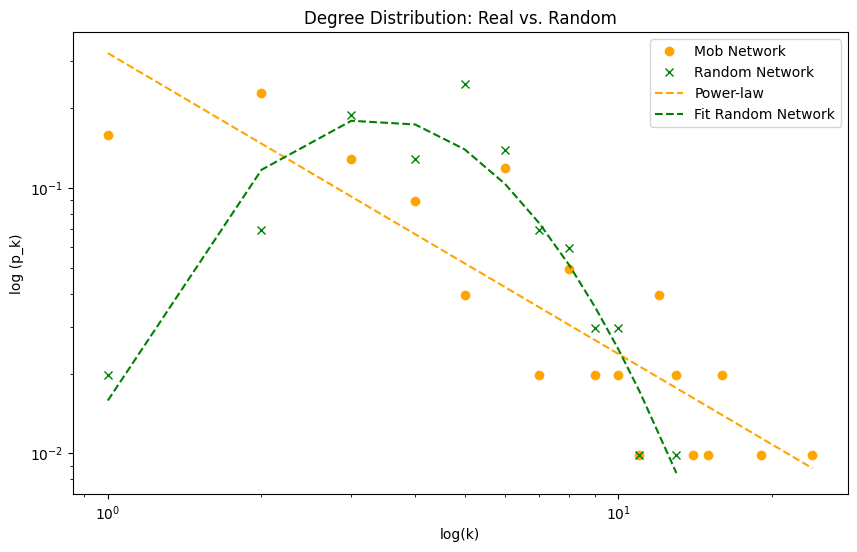

In [135]:
plt.figure(figsize=(10,6))

plt.loglog(degree_distribution_u.keys(),
           degree_distribution_u.values(),
           'o',
           color='orange',
           label='Mob Network')


plt.loglog(degree_distribution_rn.keys(),
           degree_distribution_rn.values(),
           'x',
           color='green',
           label='Random Network')

plt.plot(np.exp(log_degrees_u),
         np.exp(fit_line_u),
         '--',
         color='orange',
         label='Power-law')

plt.plot(np.exp(log_degrees_rn),
         np.exp(poly_fit_rn(log_degrees_rn)),
         '--',
         color='green',
         label='Fit Random Network')

plt.ylabel('log (p_k)')
plt.xlabel('log(k)')
plt.legend()
plt.title('Degree Distribution: Real vs. Random')
plt.show()



For large k, the power-law is above the Random Network distribution: meaning a higher chance to find high degree values in the Mob network compared to the RN

### WEIGHTS

In [110]:
# Extract edge weights
edge_weights = [data['weight'] for v_i, v_j, data in G.edges(data=True)]


In [111]:
average_weight = np.mean(edge_weights)
min_weight = np.min(edge_weights)
max_weight = np.max(edge_weights)
std_weight = np.std(edge_weights)
median_weight = np.median(edge_weights)

print(f"Average Weight = {average_weight}")
print(f"Minimum Weight = {min_weight}")
print(f"Maximum Weight = {max_weight}")
print(f"Standard Deviation of Weights = {std_weight}")
print(f"Median Weight = {median_weight}")

Average Weight = 1.4431372549019608
Minimum Weight = 1
Maximum Weight = 10
Standard Deviation of Weights = 1.0899280245998588
Median Weight = 1.0


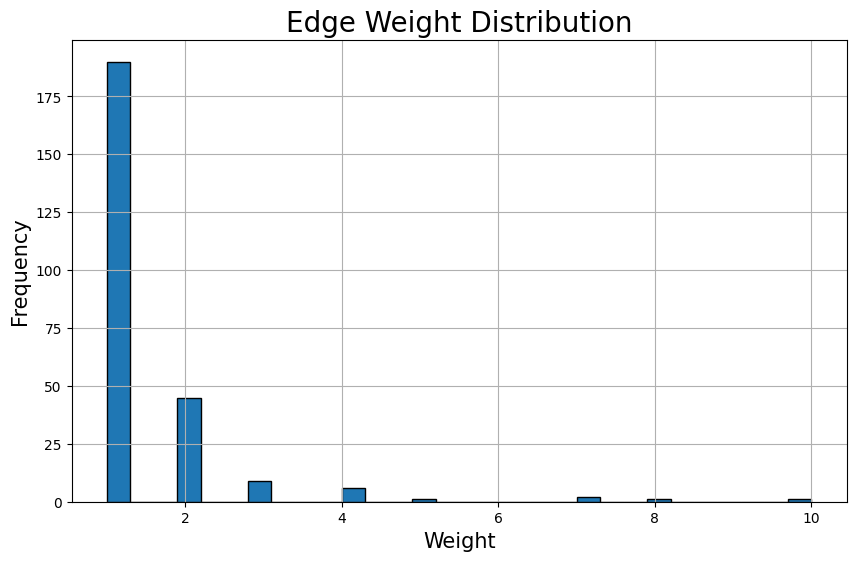

In [112]:
# Plot histogram of edge weights
plt.figure(figsize=(10, 6))
plt.hist(edge_weights, bins=30, edgecolor='black')
plt.title('Edge Weight Distribution', fontsize=20)
plt.xlabel('Weight', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.show()

### CENTRALITY

#### Weighted

In [113]:
# Centrality measures
norm_centrality = dict(sorted({node: sum(weight for _, _, weight in G.edges(node, data='weight'))/(G.number_of_nodes()-1) for node in G.nodes()}.items()))
betweenness_centrality = dict(sorted(nx.betweenness_centrality(G, weight='weight').items()))
closeness_centrality = dict(sorted(nx.closeness_centrality(G, distance='weight').items()))
eigenvector_centrality = dict(sorted(nx.eigenvector_centrality(G, weight='weight').items()))

print('WEIGHTED')
print("Centrality = ", degree)
print('Normalized Centrality = ', norm_centrality)
print(f"Betweenness Centrality = {betweenness_centrality}")
print(f'Closeness Centrality = {closeness_centrality}')
print(f'Eigenvector Centrality = {eigenvector_centrality}')

WEIGHTED
Centrality =  5
Normalized Centrality =  {0: 0.01, 1: 0.01, 2: 0.02, 3: 0.08, 4: 0.06, 5: 0.1, 6: 0.1, 7: 0.06, 8: 0.06, 9: 0.06, 10: 0.05, 11: 0.15, 12: 0.21, 13: 0.1, 14: 0.1, 15: 0.1, 16: 0.01, 17: 0.01, 18: 0.3, 19: 0.11, 20: 0.02, 21: 0.02, 22: 0.22, 23: 0.1, 24: 0.01, 25: 0.17, 26: 0.02, 27: 0.27, 28: 0.05, 29: 0.23, 30: 0.02, 31: 0.03, 32: 0.02, 33: 0.04, 34: 0.08, 35: 0.05, 36: 0.11, 37: 0.02, 38: 0.07, 39: 0.07, 40: 0.03, 41: 0.03, 42: 0.03, 43: 0.13, 44: 0.03, 45: 0.24, 46: 0.04, 47: 0.54, 48: 0.24, 49: 0.04, 50: 0.18, 51: 0.23, 52: 0.03, 53: 0.02, 54: 0.07, 55: 0.02, 56: 0.01, 57: 0.01, 58: 0.02, 59: 0.02, 60: 0.02, 61: 0.04, 62: 0.01, 63: 0.08, 64: 0.13, 65: 0.01, 66: 0.01, 67: 0.01, 68: 0.25, 69: 0.01, 70: 0.15, 71: 0.02, 72: 0.03, 73: 0.01, 74: 0.01, 75: 0.05, 76: 0.09, 77: 0.05, 78: 0.02, 79: 0.05, 80: 0.03, 81: 0.03, 82: 0.03, 83: 0.02, 84: 0.04, 85: 0.09, 86: 0.04, 87: 0.04, 88: 0.02, 89: 0.34, 90: 0.04, 91: 0.02, 92: 0.02, 93: 0.11, 94: 0.02, 95: 0.03, 96: 0.

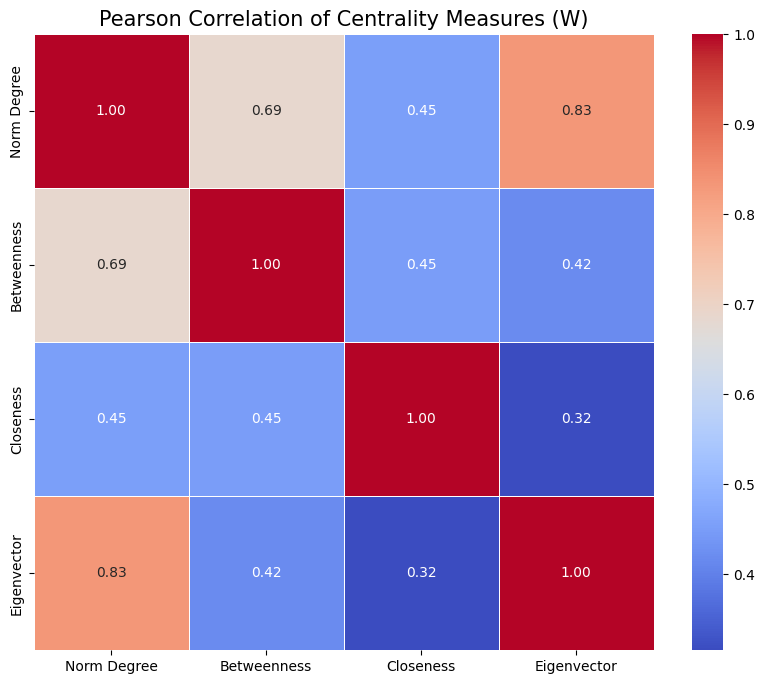

In [114]:
# Create a DataFrame from the centrality measures
centrality_df = pd.DataFrame({
    'Norm Degree': pd.Series(norm_centrality),
    'Betweenness': pd.Series(betweenness_centrality),
    'Closeness': pd.Series(closeness_centrality),
    'Eigenvector': pd.Series(eigenvector_centrality)
})

# Calculate the correlation matrix
correlation_matrix = centrality_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation of Centrality Measures (W)', fontsize=15)
plt.show()

#### Unweighted

In [115]:
# Centrality measures
norm_centrality_u = dict(sorted(nx.degree_centrality(Gu).items()))
betweenness_centrality_u = dict(sorted(nx.betweenness_centrality(Gu).items()))
closeness_centrality_u = dict(sorted(nx.closeness_centrality(Gu).items()))
eigenvector_centrality_u = dict(sorted(nx.eigenvector_centrality(Gu).items()))

print('UNWEIGHTED')
print("Centrality = ", degree_u)
print('Normalized Centrality = ', norm_centrality_u)
print(f"Betweenness Centrality = {betweenness_centrality_u}")
print(f'Closeness Centrality = {closeness_centrality_u}')
print(f'Eigenvector Centrality = {eigenvector_centrality_u}')

UNWEIGHTED
Centrality =  {0: 1, 1: 1, 2: 2, 3: 8, 4: 6, 5: 10, 6: 10, 7: 6, 8: 6, 9: 6, 10: 5, 11: 12, 12: 16, 13: 6, 14: 6, 15: 6, 16: 1, 17: 1, 18: 24, 19: 9, 20: 2, 21: 2, 22: 14, 23: 8, 24: 1, 25: 13, 26: 2, 27: 16, 28: 5, 29: 13, 30: 2, 31: 2, 32: 2, 33: 3, 34: 6, 35: 5, 36: 8, 37: 2, 38: 3, 39: 7, 40: 3, 41: 3, 42: 3, 43: 9, 44: 3, 45: 12, 46: 4, 47: 19, 48: 12, 49: 4, 50: 8, 51: 11, 52: 3, 53: 2, 54: 6, 55: 2, 56: 1, 57: 1, 58: 2, 59: 2, 60: 2, 61: 4, 62: 1, 63: 4, 64: 6, 65: 1, 66: 1, 67: 1, 68: 15, 69: 1, 70: 6, 71: 2, 72: 2, 73: 1, 74: 1, 75: 4, 76: 7, 77: 3, 78: 2, 79: 5, 80: 3, 81: 3, 82: 3, 83: 2, 84: 4, 85: 8, 86: 4, 87: 4, 88: 2, 89: 12, 90: 2, 91: 2, 92: 2, 93: 6, 94: 2, 95: 3, 96: 1, 97: 3, 98: 2, 99: 1, 100: 4}
Normalized Centrality =  {0: 0.01, 1: 0.01, 2: 0.02, 3: 0.08, 4: 0.06, 5: 0.1, 6: 0.1, 7: 0.06, 8: 0.06, 9: 0.06, 10: 0.05, 11: 0.12, 12: 0.16, 13: 0.06, 14: 0.06, 15: 0.06, 16: 0.01, 17: 0.01, 18: 0.24, 19: 0.09, 20: 0.02, 21: 0.02, 22: 0.14, 23: 0.08, 24: 0.0

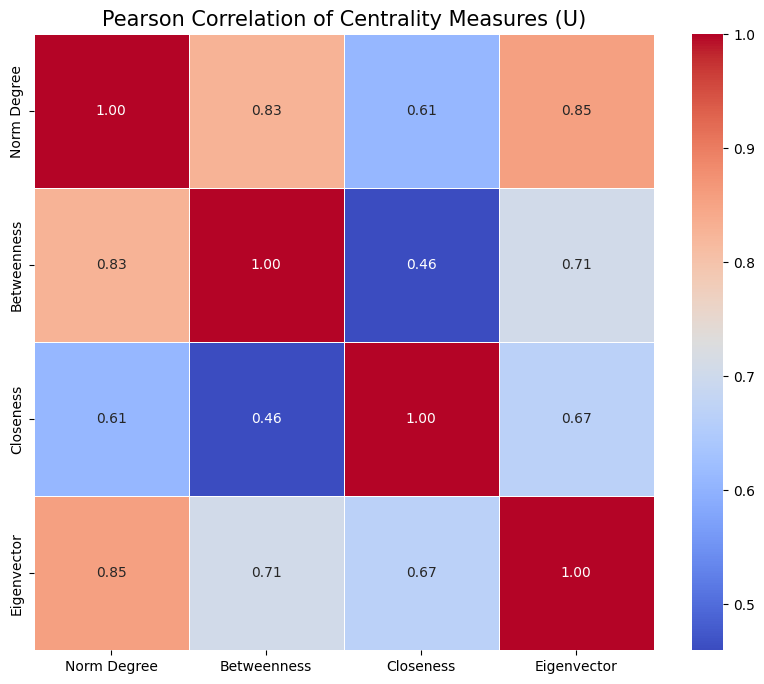

In [116]:
# Create a DataFrame from the centrality measures
centrality_df_u = pd.DataFrame({
    'Norm Degree': pd.Series(norm_centrality_u),
    'Betweenness': pd.Series(betweenness_centrality_u),
    'Closeness': pd.Series(closeness_centrality_u),
    'Eigenvector': pd.Series(eigenvector_centrality_u)
})

# Calculate the correlation matrix
correlation_matrix_u = centrality_df_u.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_u, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation of Centrality Measures (U)', fontsize=15)
plt.show()

### CONNECTIVITY

The Graph, as seen from the plot, is disconnected. Let's analyze the connected components

#### Weighted

In [117]:
# Connectivity Analysis
print(f'Number of connected components = {nx.number_connected_components(G)}')

cc_order = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(f'Order of the connected components = {cc_order}')

# Create LCC subgraph
lcc_nodes = max(nx.connected_components(G), key=len)
lcc = G.subgraph(lcc_nodes).copy()
print(f'Largest connected component is a {lcc}')
print(f'LCC consist of {(len(lcc)/len(G))*100:.3f}% the whole network')

# LCC connectivity
lcc_vertex_connectivity = nx.node_connectivity(lcc)
lcc_edge_connectivity = nx.edge_connectivity(lcc)
print(f"LCC Vertex Connectivity = {lcc_vertex_connectivity}")
print(f"LCC Edge Connectivity = {lcc_edge_connectivity}")

# LCC path analysis
lcc_shortest_paths = dict(nx.all_pairs_dijkstra_path_length(lcc, weight='weight'))
lcc_avg_path_length = nx.average_shortest_path_length(lcc, weight='weight')
lcc_diameter = nx.diameter(lcc, weight='weight')
# print(f'LCC Shortest path = {lcc_shortest_paths}')
print(f'LCC avg path length = {lcc_avg_path_length:.3f}')
print(f'LCC Diameter = {lcc_diameter}')

Number of connected components = 5
Order of the connected components = [92, 3, 2, 2, 2]
Largest connected component is a Graph with 92 nodes and 250 edges
LCC consist of 91.089% the whole network
LCC Vertex Connectivity = 1
LCC Edge Connectivity = 1
LCC avg path length = 3.841
LCC Diameter = 9


#### Unweighted

In [118]:
# Create LCC subgraph
lcc_u = Gu.subgraph(lcc_nodes).copy()
print(f'Largest connected component is a {lcc_u}')
print(f'LCC consist of {(len(lcc_u)/len(Gu))*100:.3f}% the whole network')

# LCC connectivity
lcc_vertex_connectivity_u = nx.node_connectivity(lcc_u)
lcc_edge_connectivity_u = nx.edge_connectivity(lcc_u)
print(f"LCC Vertex Connectivity = {lcc_vertex_connectivity_u}")
print(f"LCC Edge Connectivity = {lcc_edge_connectivity_u}")

# LCC path analysis
lcc_shortest_paths_u = dict(nx.all_pairs_dijkstra_path_length(lcc_u))
lcc_avg_path_length_u = nx.average_shortest_path_length(lcc_u)
lcc_diameter_u = nx.diameter(lcc_u)
# print(f'LCC Shortest path = {lcc_shortest_paths}')
print(f'LCC avg path length = {lcc_avg_path_length_u:.3f}')
print(f'LCC Diameter = {lcc_diameter_u}')

Largest connected component is a Graph with 92 nodes and 250 edges
LCC consist of 91.089% the whole network
LCC Vertex Connectivity = 1
LCC Edge Connectivity = 1
LCC avg path length = 3.309
LCC Diameter = 7


#### RN Comparison

In [143]:
print(f'Number of connected components = {nx.number_connected_components(random_network)}')

# RN connectivity
vertex_connectivity_rn = nx.node_connectivity(random_network)
edge_connectivity_rn = nx.edge_connectivity(random_network)
print(f"RN Vertex Connectivity = {vertex_connectivity_rn}")
print(f"RN Edge Connectivity = {edge_connectivity_rn}")

# RN path analysis
shortest_paths_rn = dict(nx.all_pairs_dijkstra_path_length(random_network))
avg_path_length_rn = nx.average_shortest_path_length(random_network)
diameter_rn = nx.diameter(random_network)
print(f'RN avg path length = {avg_path_length_rn:.3f}')
print(f'RN Diameter = {diameter_rn}')


Number of connected components = 1
RN Vertex Connectivity = 1
RN Edge Connectivity = 1
RN avg path length = 2.995
RN Diameter = 6


### TRANSITIVITY

#### Weighted

In [138]:
# Clustering Coefficient
local_clustering = nx.clustering(G, weight='weight')
global_clustering = nx.transitivity(G)

# Triadic closure
triangles = nx.triangles(G)
triangles = dict(sorted(triangles.items(), key=lambda item:item[1], reverse=True))

print(f'Avg Local Clustering Coefficient = {np.mean(list(local_clustering.values()))}')
print(f"Global Clustering Coefficient = {global_clustering}")
print('Number of triangles per node = ', triangles)

Avg Local Clustering Coefficient = 0.08330163789447179
Global Clustering Coefficient = 0.41658488714425906
Number of triangles per node =  {47: 48, 18: 38, 12: 36, 27: 33, 11: 29, 68: 29, 45: 28, 48: 28, 5: 27, 6: 27, 25: 27, 89: 27, 29: 26, 51: 22, 3: 20, 43: 19, 50: 16, 85: 16, 4: 15, 7: 15, 8: 15, 9: 15, 22: 15, 13: 14, 14: 14, 15: 14, 23: 14, 19: 13, 34: 13, 10: 10, 28: 10, 35: 10, 36: 10, 64: 10, 39: 9, 54: 9, 76: 9, 70: 7, 93: 7, 46: 6, 49: 6, 84: 6, 86: 6, 87: 6, 100: 6, 75: 5, 79: 4, 40: 3, 41: 3, 42: 3, 44: 3, 63: 3, 77: 3, 80: 3, 81: 3, 82: 3, 95: 3, 97: 3, 33: 2, 38: 2, 20: 1, 21: 1, 26: 1, 30: 1, 31: 1, 32: 1, 52: 1, 53: 1, 55: 1, 58: 1, 59: 1, 60: 1, 61: 1, 71: 1, 72: 1, 78: 1, 83: 1, 88: 1, 90: 1, 91: 1, 92: 1, 94: 1, 98: 1, 0: 0, 2: 0, 1: 0, 16: 0, 17: 0, 24: 0, 37: 0, 56: 0, 57: 0, 62: 0, 65: 0, 66: 0, 67: 0, 69: 0, 73: 0, 74: 0, 96: 0, 99: 0}


#### Unweighted

In [139]:
local_clustering_u = nx.clustering(Gu)
global_clustering_u = nx.transitivity(Gu)

print(f'Avg Local Clustering Coefficient = {np.mean(list(local_clustering_u.values()))}')
print(f"Global Clustering Coefficient = {global_clustering_u}")
print('Number of triangles per node = ', triangles) # number of triangles is the same as for the weighted

Avg Local Clustering Coefficient = 0.6267773883657383
Global Clustering Coefficient = 0.41658488714425906
Number of triangles per node =  {47: 48, 18: 38, 12: 36, 27: 33, 11: 29, 68: 29, 45: 28, 48: 28, 5: 27, 6: 27, 25: 27, 89: 27, 29: 26, 51: 22, 3: 20, 43: 19, 50: 16, 85: 16, 4: 15, 7: 15, 8: 15, 9: 15, 22: 15, 13: 14, 14: 14, 15: 14, 23: 14, 19: 13, 34: 13, 10: 10, 28: 10, 35: 10, 36: 10, 64: 10, 39: 9, 54: 9, 76: 9, 70: 7, 93: 7, 46: 6, 49: 6, 84: 6, 86: 6, 87: 6, 100: 6, 75: 5, 79: 4, 40: 3, 41: 3, 42: 3, 44: 3, 63: 3, 77: 3, 80: 3, 81: 3, 82: 3, 95: 3, 97: 3, 33: 2, 38: 2, 20: 1, 21: 1, 26: 1, 30: 1, 31: 1, 32: 1, 52: 1, 53: 1, 55: 1, 58: 1, 59: 1, 60: 1, 61: 1, 71: 1, 72: 1, 78: 1, 83: 1, 88: 1, 90: 1, 91: 1, 92: 1, 94: 1, 98: 1, 0: 0, 2: 0, 1: 0, 16: 0, 17: 0, 24: 0, 37: 0, 56: 0, 57: 0, 62: 0, 65: 0, 66: 0, 67: 0, 69: 0, 73: 0, 74: 0, 96: 0, 99: 0}


##### RN Comparison

In [140]:
# Clustering Coefficient
local_clustering_rn = nx.clustering(random_network)
global_clustering_rn = nx.transitivity(random_network)

# Triadic closure
triangles_rn = nx.triangles(random_network)
triangles_rn = dict(sorted(triangles_rn.items(), key=lambda item:item[1], reverse=True))

print('RANDOM NETWORK')
print(f'Avg Local Clustering Coefficient = {np.mean(list(local_clustering_rn.values()))}')
print(f"Global Clustering Coefficient = {global_clustering_rn}")
print('Number of triangles per node = ', triangles_rn)

RANDOM NETWORK
Avg Local Clustering Coefficient = 0.03991091416833992
Global Clustering Coefficient = 0.04640371229698376
Number of triangles per node =  {20: 4, 29: 4, 61: 4, 65: 3, 75: 3, 1: 2, 44: 2, 52: 2, 57: 2, 67: 2, 70: 2, 80: 2, 86: 2, 96: 2, 97: 2, 0: 1, 4: 1, 9: 1, 10: 1, 14: 1, 16: 1, 17: 1, 25: 1, 28: 1, 31: 1, 33: 1, 41: 1, 45: 1, 56: 1, 64: 1, 66: 1, 71: 1, 78: 1, 82: 1, 94: 1, 99: 1, 100: 1, 2: 0, 3: 0, 5: 0, 6: 0, 7: 0, 8: 0, 11: 0, 12: 0, 13: 0, 15: 0, 18: 0, 19: 0, 21: 0, 22: 0, 23: 0, 24: 0, 26: 0, 27: 0, 30: 0, 32: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 42: 0, 43: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 53: 0, 54: 0, 55: 0, 58: 0, 59: 0, 60: 0, 62: 0, 63: 0, 68: 0, 69: 0, 72: 0, 73: 0, 74: 0, 76: 0, 77: 0, 79: 0, 81: 0, 83: 0, 84: 0, 85: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 95: 0, 98: 0}


In the Random Network we have clustering coeff. values way smaller than the Mob network

### DEGREE ASSORTATIVITY

#### Weighted

In [144]:
# Degree Assortativity
degree_assortativity = nx.degree_assortativity_coefficient(G, weight='weight')

print(f"Degree Assortativity Coefficient = {degree_assortativity}")

Degree Assortativity Coefficient = 0.0748892763669043


#### Unweighted

In [145]:
# Degree Assortativity
degree_assortativity_u = nx.degree_assortativity_coefficient(Gu)

print(f"Degree Assortativity Coefficient = {degree_assortativity_u}")

Degree Assortativity Coefficient = -0.04342993387946205


##### RN Comparison

In [146]:
# Degree Assortativity
degree_assortativity_rn = nx.degree_assortativity_coefficient(random_network)

print(f"Degree Assortativity Coefficient = {degree_assortativity_rn}")

Degree Assortativity Coefficient = 0.08704760264949037


In [122]:
# Spectral Properties
adjacency_matrix = nx.adjacency_matrix(G).todense()
laplacian_matrix = nx.laplacian_matrix(G).todense()
eigenvalues, eigenvectors = np.linalg.eigh(adjacency_matrix)

print(f'Eigenvalues of Adjacency Matrix = {eigenvalues}')


Eigenvalues of Adjacency Matrix = [-1.45658484e+01 -9.89385078e+00 -6.94172868e+00 -5.92098820e+00
 -5.18834049e+00 -4.78692648e+00 -4.57959982e+00 -4.23337274e+00
 -3.78953970e+00 -2.90974155e+00 -2.78867036e+00 -2.57332563e+00
 -2.31718572e+00 -2.00000000e+00 -2.00000000e+00 -1.95110860e+00
 -1.75466950e+00 -1.72765069e+00 -1.67529777e+00 -1.62359470e+00
 -1.53649869e+00 -1.52247266e+00 -1.48395167e+00 -1.41421356e+00
 -1.40957127e+00 -1.36227246e+00 -1.34673876e+00 -1.29857777e+00
 -1.12825954e+00 -1.01668185e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -8.77079581e-01 -7.56773209e-01 -7.16656709e-01
 -6.80293150e-01 -4.94646737e-01 -3.69286072e-01 -2.21942960e-01
 -9.94946511e-16 -3.42800219e-16 -2.76468593e-16 -1.97421579e-16
 -6.07153217e-18  1.19659484e-16  6.11171045e-16  6.6522

In [123]:
# Miscellaneous Properties
isolated_vertices = list(nx.isolates(G))
bridges = list(nx.bridges(G))

print(f'Isolated Vertices = {isolated_vertices}')
print(f'Bridges = {bridges}')

Isolated Vertices = []
Bridges = [(0, 2), (2, 1), (16, 17), (18, 65), (22, 99), (23, 24), (36, 37), (37, 67), (52, 96), (56, 57), (61, 62), (61, 66), (68, 69), (73, 74)]
